# 0. Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import randint
from math import pi as PI
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics

plt.style.use('ggplot')

%matplotlib inline

# 1. Load Data

Synthetic data:

y = sin (2*pi*x)+Noise(u,sigma^2)

Where:

Noise: is a Gaussian noise with mean u and standard deviation sigma.
y: output
x: input { x ∈ R ∣ 0 < x < 1 }

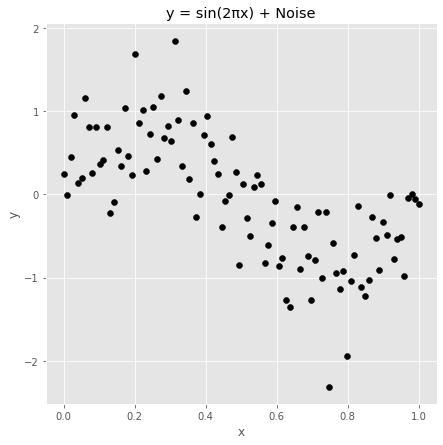

In [2]:
# number of observations N
N = 100
np.random.seed(42)

# predictors
X = np.linspace(0, 1, num = N)
# noise
noise = np.random.normal(0, 0.5, N)
# outcome
y = np.sin(2*PI*X) + noise

fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(2πx) + Noise')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X, y, c = 'k')

plt.show()

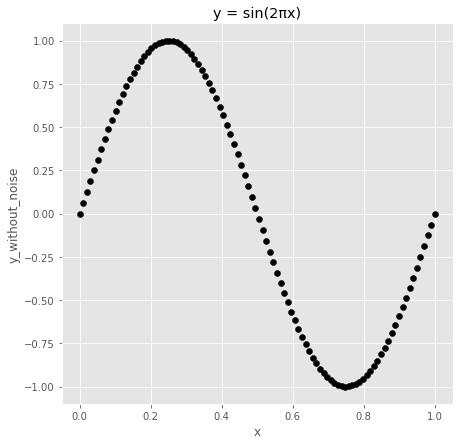

In [3]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(2πx)')
ax.set_xlabel("x")
ax.set_ylabel("y_without_noise")

ax.scatter(X, y = np.sin(2*PI*X), c = 'k')

plt.show()

# 2. Polynomial Regression Model

In [4]:
# Vamos a dividir los datos en un conjunto de entrenamiento y un conjunto de pruebas.
mezclar_los_datos       = True #Vamos a mezclar de forma aleatoria los datos antes de particionarlos. 
valor_semilla_aleatoria = 42   #Esto es útil si se quiere garantizar la repetibilidad 
                               #de la partición de datos en ejecuciones sucesivas de su notebook o script. 

#Porcentajes de división de datos. 
particion_para_entrenamiento = 0.8  #Dejamos el 60% de los datos para el conjunto de entrenamiento (training set).
particion_para_pruebas    = 0.2  #Dejamos el 20% de los datos para el conjunto de desarrollo (dev set).

X_train, X_test, y_train, y_test = train_test_split(X,             #100% de los datos de entrada. 
                                                    y,           #100% de los datos de salida. 
                                                    test_size=particion_para_pruebas, 
                                                    random_state=valor_semilla_aleatoria, 
                                                    shuffle=mezclar_los_datos)


In [5]:
print('Training set shape: ', X_train.shape)
print('Test set shape: ', X_test.shape)

Training set shape:  (80,)
Test set shape:  (20,)


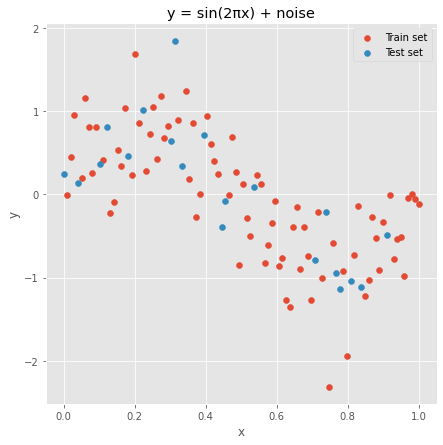

In [6]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes()
ax.set_title('y = sin(2πx) + noise')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, label = "Train set")
ax.scatter(X_test, y_test, label = "Test set")
ax.legend()

plt.show()

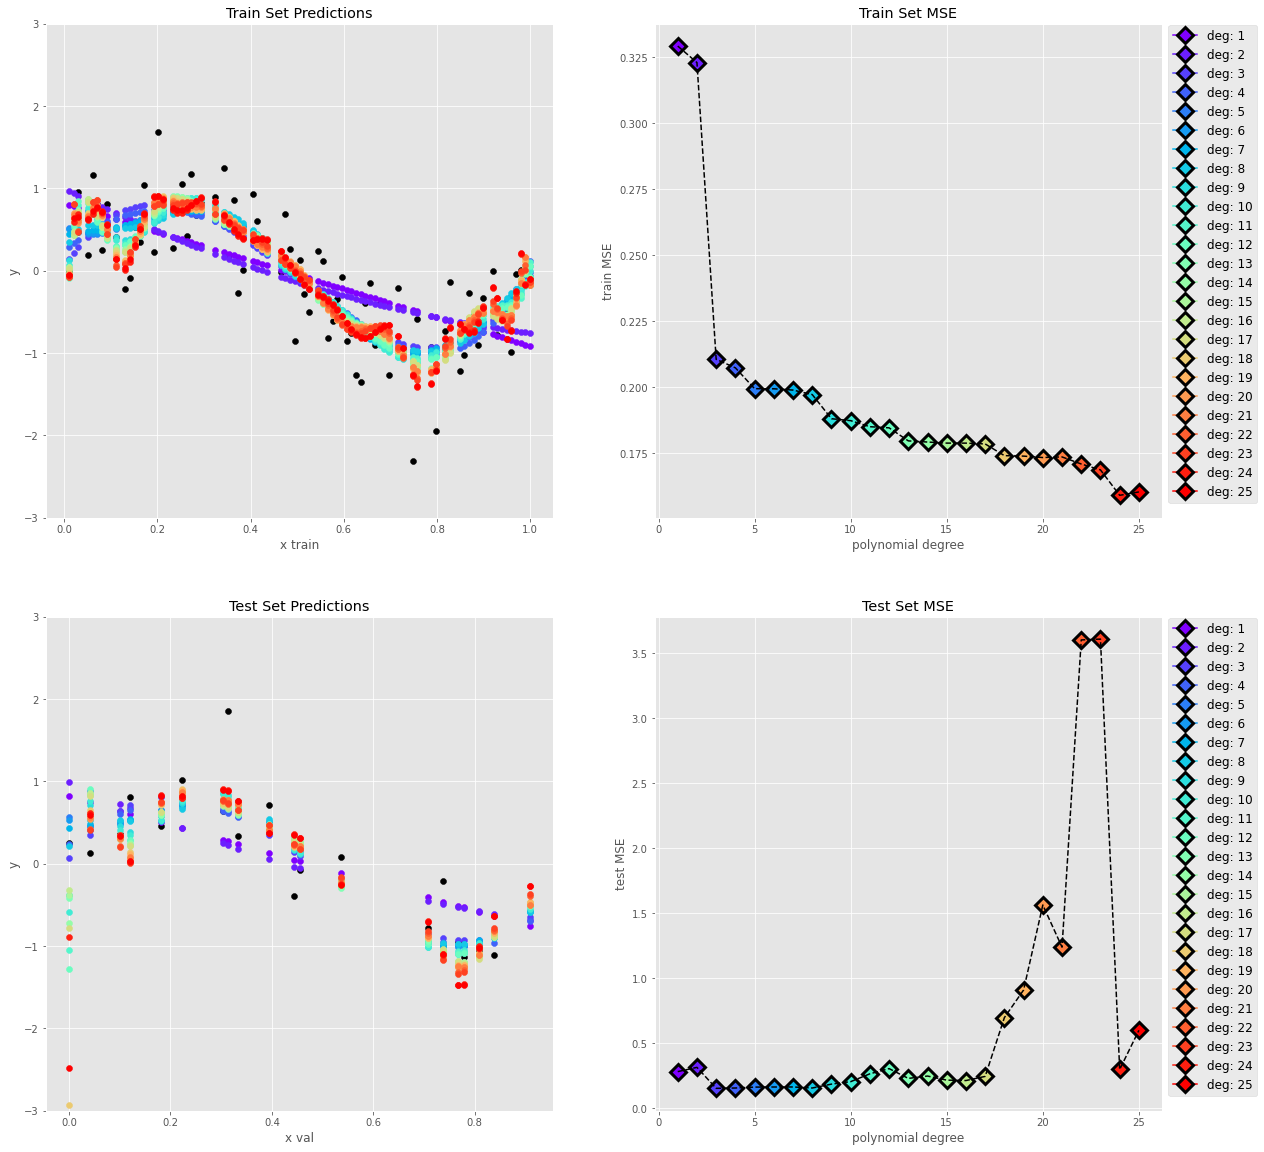

In [7]:
from sklearn.linear_model import LinearRegression

#x_train = x_train.reshape(-1,1)
#y_train = y_train.reshape(-1,1)
#x_val = x_val.reshape(-1,1)
#y_val = y_val.reshape(-1,1)
#x_test = x_test.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

# number of polynomial models to investigate
NUM_MODELS = 25

colors = iter(plt.cm.rainbow(np.linspace(0, 1, NUM_MODELS)))

fig, axs = plt.subplots(2, 2, figsize = (20,20))

axs[0, 0].set_title('Train Set Predictions')
axs[1, 0].set_title('Test Set Predictions')
axs[0, 1].set_title('Train Set MSE')
axs[1, 1].set_title('Test Set MSE')

axs[0, 0].set_xlabel("x train")
axs[0, 0].set_ylabel("y")
axs[0, 0].set_ylim([-3, 3])

axs[1, 0].set_xlabel("x val")
axs[1, 0].set_ylabel("y")
axs[1, 0].set_ylim([-3, 3])

axs[0, 1].set_xlabel("polynomial degree")
axs[0, 1].set_ylabel("train MSE")

axs[1, 1].set_xlabel("polynomial degree")
axs[1, 1].set_ylabel("test MSE")

axs[0,0].scatter(X_train, y_train, c = 'k', label = "y train")
axs[1,0].scatter(X_test, y_test, c = 'k', label = "y val")

train_mse = []
test_mse = []

for k in range(0, NUM_MODELS):
    
    lin_reg = LinearRegression()
    
    x_t = []
    x_v = []
    
    deg = k+1
    
    for i in range(deg):
        #x_t.append(x_train[:,0]**(i+1))
        #x_v.append(x_val[:,0]**(i+1))
        x_t.append(X_train**(i+1))
        x_v.append(X_test**(i+1))
        
    x_t = np.array(x_t)
    x_t = np.transpose(x_t)

    x_v = np.array(x_v)
    x_v = np.transpose(x_v)
    
    lin_reg.fit(x_t,y_train)
    
    y_train_pred = lin_reg.predict(x_t)
    y_test_pred = lin_reg.predict(x_v)

    c = next(colors)

    # k-th degree polynomial coefficients
    #fit_coeff = np.polyfit(x_train, y_train, deg = k+1)

    # train and test k-th degree polynomial fit
    #y_train_pred = np.polyval(fit_coeff, x_train)
    #y_val_pred = np.polyval(fit_coeff, x_val)

    # plot train and test k-th degree polynomial fit
    axs[0,0].scatter(X_train,
                   y_train_pred,
                   color = c,
                   label = "deg: {}".format(k+1))

    axs[1,0].scatter(X_test,
                   y_test_pred,
                   color = c,
                   label = "deg: {}".format(k+1))

    # train and test MSE of k-th degree polynomial fit 
    iter_train_mse = mean_squared_error(y_train_pred, y_train)
    iter_test_mse = mean_squared_error(y_test_pred, y_test)

    train_mse.append(iter_train_mse)
    test_mse.append(iter_test_mse)

    # plot train and test MSE of k-th degree polynomial fit
    axs[0,1].plot(k+1,
                iter_train_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)

    axs[1,1].plot(k+1,
                iter_test_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)

# plot dashed line to interpolate MSE measures
axs[0,1].plot(range(1,NUM_MODELS+1), train_mse, 'k--')
axs[1,1].plot(range(1,NUM_MODELS+1), test_mse, 'k--')

# draw legends
axs[0,1].legend(loc = "upper right",
                bbox_to_anchor = (1.2, 1.01),
                prop = {'size': 12})
axs[1,1].legend(loc = "upper right",
                bbox_to_anchor = (1.2, 1.01),
                prop = {'size': 12})

plt.show()

In [8]:
print("Best fit polynomial degree: ", test_mse.index(min(test_mse))+1)

Best fit polynomial degree:  3


In [9]:
from sklearn.linear_model import LinearRegression

deg = 20

lin_reg_2 = LinearRegression()

x_t = []
x_v = []

for i in range(deg):
    x_t.append(X_train**(i+1))
    x_v.append(X_test**(i+1))
    
x_t = np.array(x_t)
x_t = np.transpose(x_t)

x_v = np.array(x_v)
x_v = np.transpose(x_v)

lin_reg.fit(x_t,y_train)

y_train_pred = lin_reg.predict(x_t)
y_test_pred = lin_reg.predict(x_v)

Training
R^2: 0.7031
MSE: 0.1734
RMSE: 0.4164


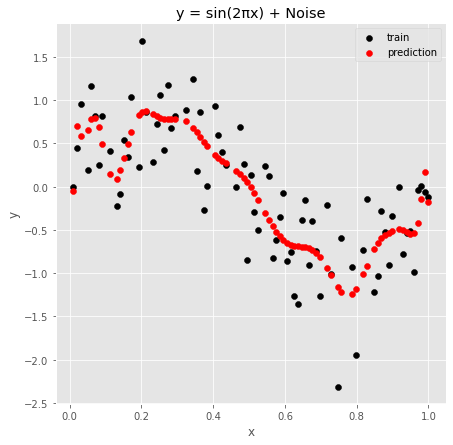

In [10]:
print('Training')
score = metrics.r2_score(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
print('R^2: %.4f' % score)
print('MSE: %.4f'% mse)
print('RMSE: %.4f' % rmse)

fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(2πx) + Noise')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, c = 'k',label="train")
ax.scatter(X_train, y_train_pred, c = 'r',label="prediction")
ax.legend(loc="upper right")

plt.show()

Test
R^2: -1.5739
MSE: 1.5628
RMSE: 1.2501


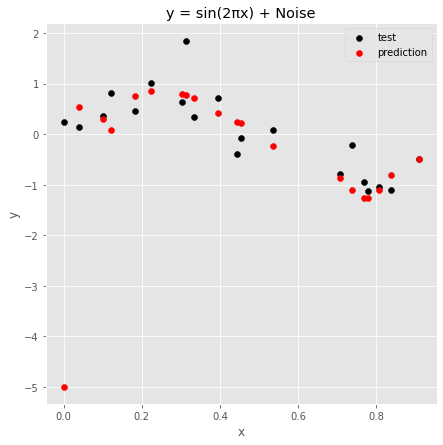

In [11]:
print('Test')
score = metrics.r2_score(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print('R^2: %.4f' % score)
print('MSE: %.4f'% mse)
print('RMSE: %.4f' % rmse)

fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(2πx) + Noise')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_test, y_test, c = 'k',label="test")
ax.scatter(X_test, y_test_pred, c = 'r',label="prediction")
ax.legend(loc="upper right")

plt.show()

In [12]:
print("Intercept w0: ", lin_reg.intercept_)
print("Coefficients: ", lin_reg.coef_)

Intercept w0:  -4.9895759736905525
Coefficients:  [ 9.12087271e+02 -5.80678803e+04  1.94432458e+06 -3.91566076e+07
  5.16512520e+08 -4.73976838e+09  3.15947074e+10 -1.57809852e+11
  6.03802086e+11 -1.79670159e+12  4.19768697e+12 -7.73506374e+12
  1.12382123e+13 -1.28021735e+13  1.12983100e+13 -7.56589335e+12
  3.71421861e+12 -1.26015012e+12  2.63933311e+11 -2.57053168e+10]


# 3. Polinomial Regression Model with L2 Regularization

In [13]:
deg = 20

x_t = []
x_v = []

for i in range(deg):
    x_t.append(X_train**(i+1))
    x_v.append(X_test**(i+1))
    
x_t = np.array(x_t)
x_t = np.transpose(x_t)

x_v = np.array(x_v)
x_v = np.transpose(x_v)

In [14]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

alphas = np.arange(0.1, 10, 0.1)

tuned_parameters = [{"alpha": alphas}]
n_folds = 10

clf = GridSearchCV(ridge, tuned_parameters, cv=n_folds, scoring = 'neg_root_mean_squared_error',refit=True)
clf.fit(x_t,y_train)
scores = abs(clf.cv_results_["mean_test_score"])
scores_std = abs(clf.cv_results_["std_test_score"])

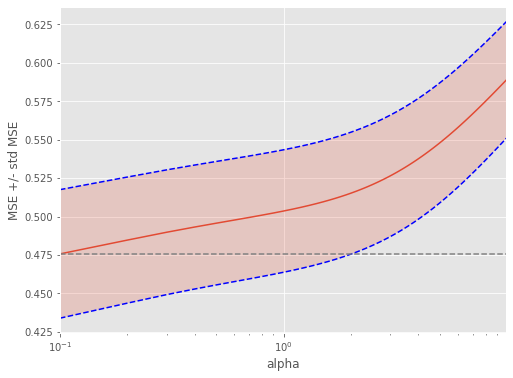

In [15]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("MSE +/- std MSE")
plt.xlabel("alpha")
plt.axhline(np.min(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])
plt.show()

In [16]:
clf.best_params_

{'alpha': 0.1}

In [17]:
alpha = 0.1
ridge = Ridge(alpha = alpha)
ridge.fit(x_t,y_train)

y_train_pred = ridge.predict(x_t)
y_test_pred = ridge.predict(x_v)

Training
R^2: 0.6154
MSE: 0.2245
RMSE: 0.4738


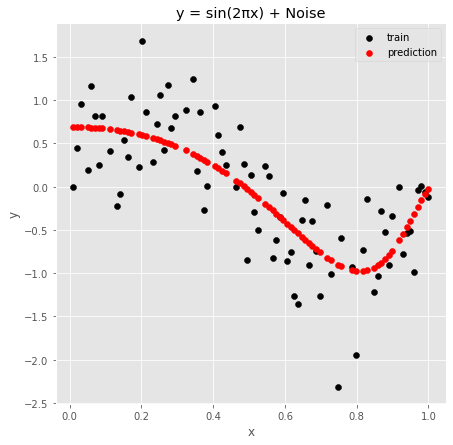

In [18]:
print('Training')
score = metrics.r2_score(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
print('R^2: %.4f' % score)
print('MSE: %.4f'% mse)
print('RMSE: %.4f' % rmse)

fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(2πx) + Noise')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, c = 'k',label="train")
ax.scatter(X_train, y_train_pred, c = 'r',label="prediction")
ax.legend(loc="upper right")

plt.show()

Test
R^2: 0.6724
MSE: 0.1989
RMSE: 0.4460


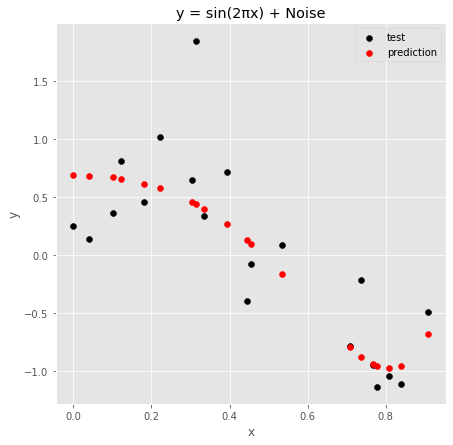

In [19]:
print('Test')
score = metrics.r2_score(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print('R^2: %.4f' % score)
print('MSE: %.4f'% mse)
print('RMSE: %.4f' % rmse)

fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(2πx) + Noise')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_test, y_test, c = 'k',label="test")
ax.scatter(X_test, y_test_pred, c = 'r',label="prediction")
ax.legend(loc="upper right")

plt.show()

In [20]:
print("Intercept w0: ", ridge.intercept_)
print("Coefficients: ", ridge.coef_)

Intercept w0:  0.6863023881665387
Coefficients:  [ 0.05553281 -2.147526   -1.65233439 -0.66099443  0.1253268   0.60442692
  0.83373544  0.89131424  0.84097027  0.72812528  0.58320372  0.42584394
  0.26831549  0.11797889 -0.02102664 -0.14664935 -0.25817069 -0.35570554
 -0.43987221 -0.51157513]


# 3. Polinomial Regression Model with L1 Regularization

In [21]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

alphas = np.arange(0.01, 10, 0.01)

tuned_parameters = [{"alpha": alphas}]
n_folds = 10

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring = 'neg_root_mean_squared_error',refit=True)
clf.fit(x_t,y_train)
scores = abs(clf.cv_results_["mean_test_score"])
scores_std = abs(clf.cv_results_["std_test_score"])

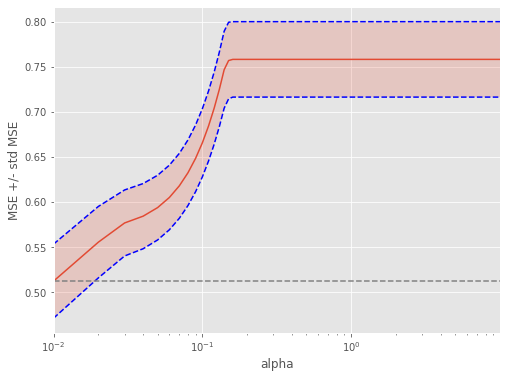

In [22]:
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("MSE +/- std MSE")
plt.xlabel("alpha")
plt.axhline(np.min(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])
plt.show()

In [23]:
clf.best_params_

{'alpha': 0.01}

In [24]:
alpha = 0.01
lasso = Lasso(alpha = alpha)
lasso.fit(x_t,y_train)

y_train_pred = lasso.predict(x_t)
y_test_pred = lasso.predict(x_v)

Training
R^2: 0.5532
MSE: 0.2609
RMSE: 0.5107


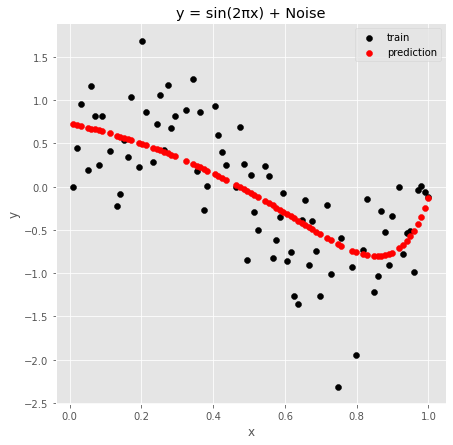

In [25]:
print('Training')
score = metrics.r2_score(y_train, y_train_pred)
mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
print('R^2: %.4f' % score)
print('MSE: %.4f'% mse)
print('RMSE: %.4f' % rmse)

fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(2πx) + Noise')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, c = 'k',label="train")
ax.scatter(X_train, y_train_pred, c = 'r',label="prediction")
ax.legend(loc="upper right")

plt.show()

Test
R^2: 0.6141
MSE: 0.2343
RMSE: 0.4840


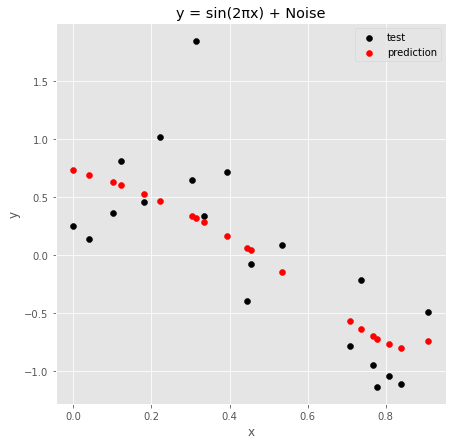

In [26]:
print('Test')
score = metrics.r2_score(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print('R^2: %.4f' % score)
print('MSE: %.4f'% mse)
print('RMSE: %.4f' % rmse)

fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(2πx) + Noise')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_test, y_test, c = 'k',label="test")
ax.scatter(X_test, y_test_pred, c = 'r',label="prediction")
ax.legend(loc="upper right")

plt.show()

In [27]:
print("Intercept w0: ", lasso.intercept_)
print("Coefficients: ", lasso.coef_)

Intercept w0:  0.728920660859103
Coefficients:  [-0.87077532 -1.42745452 -0.          0.          0.          0.
  0.          0.          0.          0.          1.4345435   0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]
